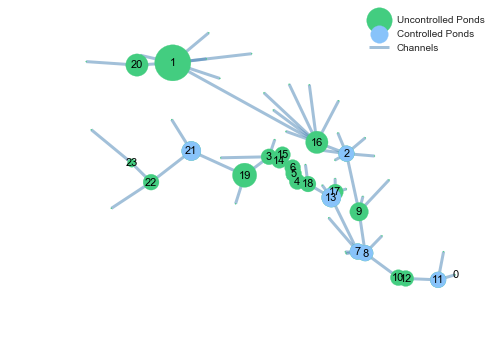

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
import seaborn as sns
sns.set_style("white")

coordinates = genfromtxt('Workbook3.csv', dtype=str, delimiter=',')
edges = genfromtxt('Workbook2.csv', dtype=str, delimiter=',')
data = genfromtxt('Workbook111.csv', dtype=str, delimiter=',')
rain_g = genfromtxt('rain.csv', dtype=str, delimiter=',')
edge_g = genfromtxt('edge_r.csv', dtype=str, delimiter=',')
c_sub = genfromtxt('sub.csv', dtype=str, delimiter=',')
c_sub = c_sub.astype(np.float)
end = []
stra = []
stra.append(0)
temp = c_sub[0][0]
for i in range(0, len(c_sub)):
    if c_sub[i][0] != temp:
        end.append(i)
        temp = c_sub[i][0]
        if i != len(c_sub):
            stra.append(i+1)
end.append(len(c_sub)-1)
cach =[]
x_c = []
y_c = []
for u, v in zip(stra, end):
    cach.append(np.sum(c_sub[u:v, 0])/(v-u))
    x_c.append(np.sum(c_sub[u:v, 1])/(v-u))
    y_c.append(np.sum(c_sub[u:v, 2])/(v-u))


G = nx.Graph()

coordinates[0][0] = '1'
edges[0][0] = '1'
data[0][0] = '91-51098'
rain_g[0][0] = 'R9032'
cach[0] = '102'
node_z = []
volume = {}
label = {}
G.add_node('1', vol=1.0)
volume['1'] = 1.0

# Input Locations
for i in range(0, len(cach)):
    G.add_node(str(int(cach[i])), pos=(x_c[i], y_c[i]))
    volume[str(int(cach[i]))] = 1.0
    label[str(int(cach[i]))] = " "

# Detention Ponds
for i in range(0, len(coordinates)):
    label[coordinates[i][0]] = str(i)
    G.add_node(coordinates[i][0], pos=(float(coordinates[i][1]),
                                       float(coordinates[i][2])))


for i in range(0, len(data)):
    volume[data[i][0]] = float(data[i][2])*float(data[i][3])*0.0005

# # Edges
for i in range(0, len(edges)):
    G.add_edge(edges[i][1], edges[i][2])
for i in range(1, len(edge_g)):
    G.add_edge(edge_g[i][0], edge_g[i][2])

G.add_edge('102', "93-90357")

pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G,pos,
                       node_color='#43cd80',
                       label='Uncontrolled Ponds',
                       node_size=[volume[v] for v in nx.nodes(G)])
ert = ['93-49743', '93-49919', '93-49921', '93-50077','93-50225', 'WATERSRD1']
nx.draw_networkx_nodes(G,pos,
                       nodelist=ert,
                       node_color="#88c3fa",
                       label='Controlled Ponds',
                       node_size=[volume[v] for v in ert])
nx.draw_networkx_edges(G,
                       pos,
                       edge_color='#4682B4',
                       label='Channels',
                       width=3.0,
                       alpha=0.5)
nx.draw_networkx_labels(G,
                        pos,
                        label,font_size=11)
plt.axis('off')
plt.legend(numpoints = 1)
plt.show()


In [32]:
len(coordinates[:,0])

24